In [1]:
# safe divide function to stop zero counts from causing problems. This is zero counts for number of words
# which can happen sometimes when texts are small, texts are empty, or content words are removed from small texts
def safe_divide(a, b): #function calls two arguments. Here it will be a POS count and number of words
    if b != 0: #
        return a/b
    else:
        return 0

In [2]:
import os
# Change to the working directory
os.chdir('/Users/zepedalab/Desktop/MATHia_NLP_YB')

#Lab wd:/Users/zepedalab/Desktop/MATHia_NLP_YB
#Home wd: /Users/yuchengbao/Desktop/ALL Lab/MATHia_NLP

import pandas as pd
import re
import spacy
!python3 -m spacy download en_core_web_sm

nlp = spacy.load("en_core_web_sm")

/Users/zepedalab/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


/Users/zepedalab/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 38.1 MB/s eta 0:00:00 0:00:01

[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [9]:
#import the dataset
text_df = pd.read_excel('/Users/zepedalab/Desktop/MATHia_NLP_YB/E1C3 Codes (COMPLETE)_1.xlsx')

#home wd: /Users/yuchengbao/PycharmProjects/JupyterProject/models/Practice Dataset.xlsx
#lab wd: /Users/zepedalab/Desktop/MATHia_NLP_YB/E1C3 Codes (COMPLETE).xlsx

In [10]:
# pre-process the text data (text_df)
text_df['input'] = text_df['input'].astype(str) # convert the text input to string type
text_df['input'] = text_df['input'].str.lower() # convert the text to lower case

text_df_3 = text_df[text_df['input'].str.len() >= 3] #can adjust the threshold here
short_input_df = text_df[text_df['input'].str.len() < 3]


In [11]:
text_df_3

,Anon.Student.Id,input,Invalid Response,Self-Efficacy,Utility Value,Intrinsic Values (replaced Interest Enhancement),Opportunity cost \n(outside effort cost),Effort,Extrinsic Rewards/ Self-Consequating,Environmental Control,...,Fear of Failure,Attention,Willpower,Seeking help from others,Emotion Regulation,Did Not Motivate,I Don't Know,No Strategy Listed,Count,Notes
0,stu_NWRXR49435,that i will awaly do better then last time,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
2,stu_KAIDW62100,nan,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
3,stu_KAIDW62100,nan,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
4,stu_KAIDW62100,". jjjnnk.nj..mi,.mk.ki.kii..l.kin.",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
7,stu_PLFUT13166,nan,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,sch_HTPUV14121,i didnt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN
462,sch_NQNWK22810,i dont want to fail so i kept telling myself t...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
463,sch_HTPUV14121,",ndcfk,sdj",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
465,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
short_input_df

,Anon.Student.Id,input,Invalid Response,Self-Efficacy,Utility Value,Intrinsic Values (replaced Interest Enhancement),Opportunity cost \n(outside effort cost),Effort,Extrinsic Rewards/ Self-Consequating,Environmental Control,...,Fear of Failure,Attention,Willpower,Seeking help from others,Emotion Regulation,Did Not Motivate,I Don't Know,No Strategy Listed,Count,Notes
1,stu_GDLLQ68531,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN
5,stu_TMJAI99056,nn,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
6,stu_QRVFN34916,e,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
11,stu_VLXIG01010,k,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
13,stu_LHFEX95759,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,sch_NQNWK22810,..,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
422,sch_NQNWK22810,y\,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
425,sch_NQNWK22810,.,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
441,sch_NQNWK22810,.,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN


In [13]:
#New method for detecting the nonsense string --- I think I will use this one ultimately
from nostril import nonsense
nonsense_df = pd.DataFrame(columns=text_df_3.columns) # to store the nonsense response
short_text_df = pd.DataFrame(columns=text_df_3.columns) # to store the response that too short to be tested by this model

# Iterate through rows and separate nonsense rows
for index, row in text_df_3.iterrows():
    try:
        text = row['input']

        # Check if the text is too short to test
        if len(text) < 6:
            # Add the short text to short_text_df
            short_text_df = pd.concat([short_text_df, row.to_frame().T], ignore_index=True)
            text_df_3 = text_df_3.drop(index)
            print(f"Row {index}: Text is too short to test")
            continue  # Skip to the next row

        # Use nostril to detect nonsense in the current row's text
        is_nonsense = nonsense(text)  # Assuming 'input' is the column containing the text

        # If the text is nonsense, add it to nonsense_df and remove from text_df_3
        if is_nonsense:
            nonsense_df = pd.concat([nonsense_df, row.to_frame().T], ignore_index=True)
            text_df_3 = text_df_3.drop(index)

        print(row['input'], is_nonsense)  # Print the row and its classification

    except Exception as e:
        print(f"Error processing row {index}: {e}")

that i will awaly do better then last time False
Row 2: Text is too short to test
Row 3: Text is too short to test
. jjjnnk.nj..mi,.mk.ki.kii..l.kin. True
Row 7: Text is too short to test
focus in classs or ask for help in work from the teacher or ask the fellow classmates. False
i am and i was hecking my work and if it didnt make since i would use the hit to help and solve it. False
i motivated myself by thinking about what would happen if i fail. False
less work to do after False
i worked hard and kept going. False
i worked hard and try to get it done False
idk so i can get out of school False
i just took my time and focus False
i just did it. False
keep tring?.. False
one of the many ways that i motivate myself is by saying that it will be ok and i is just a question. False
i motivated myslef by reminding myself that there is reward for hard work. False
i set my goal to something and do it so in the end i can do what i want False
i took my time and focused and didnt get too stressed

In [14]:
text_df_3

,Anon.Student.Id,input,Invalid Response,Self-Efficacy,Utility Value,Intrinsic Values (replaced Interest Enhancement),Opportunity cost \n(outside effort cost),Effort,Extrinsic Rewards/ Self-Consequating,Environmental Control,...,Fear of Failure,Attention,Willpower,Seeking help from others,Emotion Regulation,Did Not Motivate,I Don't Know,No Strategy Listed,Count,Notes
0,stu_NWRXR49435,that i will awaly do better then last time,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
8,stu_PLFUT13166,focus in classs or ask for help in work from t...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN
9,stu_VRMMP96431,i am and i was hecking my work and if it didnt...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
10,stu_PQGNU67655,i motivated myself by thinking about what woul...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
12,stu_CNUDZ97976,less work to do after,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,sch_NQNWK22810,i told myself to persevere. thats it.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
459,sch_NQNWK22810,idk anything about this,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
460,sch_NQNWK22810,i dont know i jjust worked hard,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN
461,sch_HTPUV14121,i didnt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN


In [15]:
#Method 1: detect the gibberish and cross-check with the human labels
#from langdetect import detect_langs

#Method 2: gibberish detector based on training model

from gibberish_detector import detector
#os.chdir('/Users/yuchengbao/Desktop/ALL Lab/MATHia_NLP')
#os.system('gibberish-detector train big.txt > gibberish-detector.model')
Detector = detector.create_from_model('/Users/zepedalab/PycharmProjects/MATHia-NLP-YB/gibberish-detector.model')
#lab wd: /Users/zepedalab/PycharmProjects/MATHia-NLP-YB/gibberish-detector.model

In [16]:
#using detector to initially test the gibberish
# Create an empty dataframe to store gibberish rows
gibberish_df = pd.DataFrame(columns=text_df_3.columns)

# Iterate through rows and separate gibberish rows
for index, row in text_df_3.iterrows():
    try:
        # Check if the row is gibberish
        is_gibberish = Detector.is_gibberish(row['input'])

        # If it is gibberish, add to the gibberish_df and remove from text_df_3
        if is_gibberish:
            gibberish_df = pd.concat([gibberish_df, row.to_frame().T], ignore_index=True)
            text_df_3 = text_df_3.drop(index)

        print(row['input'], is_gibberish)

    except Exception as e:
        print(f"Error processing row {index}: {e}")


that i will awaly do better then last time False
focus in classs or ask for help in work from the teacher or ask the fellow classmates. False
i am and i was hecking my work and if it didnt make since i would use the hit to help and solve it. False
i motivated myself by thinking about what would happen if i fail. False
less work to do after False
i worked hard and kept going. False
i worked hard and try to get it done False
idk so i can get out of school False
i just took my time and focus False
i just did it. False
keep tring?.. False
one of the many ways that i motivate myself is by saying that it will be ok and i is just a question. False
i motivated myslef by reminding myself that there is reward for hard work. False
i set my goal to something and do it so in the end i can do what i want False
i took my time and focused and didnt get too stressed False
thinking about going outside False
i kept thinking about the grade that i could get in math if i practice. False
write the problem t

In [77]:
gibberish_df

,Anon.Student.Id,input,Invalid Response,Self-Efficacy,Utility Value,Intrinsic Values (replaced Interest Enhancement),Opportunity cost \n(outside effort cost),Effort,Extrinsic Rewards/ Self-Consequating,Environmental Control,...,Fear of Failure,Attention,Willpower,Seeking help from others,Emotion Regulation,Did Not Motivate,I Don't Know,No Strategy Listed,Count,Notes
0,stu_HMCKN95919,bruhhhh,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
1,sch_NQNWK22810,3434r 34-gt4ktn'q,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
2,sch_HTPUV14121,i jsut did.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN
3,sch_NQNWK22810,bruhhhh,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
4,sch_HTPUV14121,f mudiocgufy,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
5,sch_HTPUV14121,uyfic.kfv.kuf,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
6,sch_UYJKC37038,ajskdd,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN


In [17]:
text_df_3

,Anon.Student.Id,input,Invalid Response,Self-Efficacy,Utility Value,Intrinsic Values (replaced Interest Enhancement),Opportunity cost \n(outside effort cost),Effort,Extrinsic Rewards/ Self-Consequating,Environmental Control,...,Fear of Failure,Attention,Willpower,Seeking help from others,Emotion Regulation,Did Not Motivate,I Don't Know,No Strategy Listed,Count,Notes
0,stu_NWRXR49435,that i will awaly do better then last time,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
8,stu_PLFUT13166,focus in classs or ask for help in work from t...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN
9,stu_VRMMP96431,i am and i was hecking my work and if it didnt...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
10,stu_PQGNU67655,i motivated myself by thinking about what woul...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
12,stu_CNUDZ97976,less work to do after,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,sch_NQNWK22810,i told myself to persevere. thats it.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
459,sch_NQNWK22810,idk anything about this,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
460,sch_NQNWK22810,i dont know i jjust worked hard,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN
461,sch_HTPUV14121,i didnt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN


In [9]:
%pip install lingua-language-detector
from lingua import Language, LanguageDetectorBuilder

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [58]:
#Languag Detector - Method 1:
#lingua import: https://github.com/pemistahl/lingua-py
languages = [Language.ENGLISH,Language.SPANISH]
detector = LanguageDetectorBuilder.from_languages(*languages).build()

# Create an empty dataframe to store non-English rows
non_eng_df = pd.DataFrame(columns=text_df_3.columns)

# Iterate through rows and check for non-English texts (confidence_values = 0)
for index, row in text_df_3.iterrows():
    try:
        # Get the confidence values for the language detection
        confidence_values = detector.compute_language_confidence_values(row['input'])
        # Extract the confidence value for English
        english_confidence = next((cv.value for cv in confidence_values if cv.language == Language.ENGLISH), 0)
        # Check if confidence value for English is 0 (i.e., non-English)
        if english_confidence < 0.7:
            # Add the row to the non_eng_df
            non_eng_df = pd.concat([non_eng_df, row.to_frame().T], ignore_index=True)
            # Remove the row from the original dataframe (if needed)
            #text_df_3 = text_df_3.drop(index)
        #print(row['input'], confidence_values.get(Language.ENGLISH, 0))
    except Exception as e:
        print(f"Error processing row {index}: {e}")

In [59]:
non_eng_df


,Anon.Student.Id,input,Invalid Response,Self-Efficacy,Utility Value,Intrinsic Values (replaced Interest Enhancement),Opportunity cost \n(outside effort cost),Effort,Extrinsic Rewards/ Self-Consequating,Environmental Control,...,Fear of Failure,Attention,Willpower,Seeking help from others,Emotion Regulation,Did Not Motivate,I Don't Know,No Strategy Listed,Count,Notes
0,stu_KAIDW62100,nan,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,NaN
1,stu_KAIDW62100,nan,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,NaN
2,stu_PLFUT13166,nan,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,NaN
3,stu_ZWFZI88907,i just did it.,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,NaN
4,stu_EMFNA59963,enter,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,sch_NQNWK22810,nan,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,NaN
85,sch_NQNWK22810,nan,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,NaN
86,sch_NQNWK22810,nan,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,NaN
87,sch_NQNWK22810,nan,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,NaN


In [12]:
#generate a new column 'gibberish_detected' to store the gibberish detection results
text_df['gibberish_detected'] = 0  # default column

for index, row in text_df.iterrows():
    try:
        langs = detect_langs(row['input'])

        if len(langs) > 0:
            lang = langs[0].lang
            prob = langs[0].prob

            # Mark as gibberish if not English OR English confidence < threshold
            if langs[0].lang != 'en' and langs[0].prob > 0.8:
                text_df.at[index, 'gibberish_detected'] = 1
            else:
                text_df.at[index, 'gibberish_detected'] = 0
    except:
        text_df.at[index, 'gibberish_detected'] = 1  # Mark as gibberish if detection fails

# compare with human labels
text_df['gibberish_match'] = text_df['gibberish_detected'] == text_df['Invalid Response']
# calculate accuracy
accuracy = text_df['gibberish_match'].mean()
print(f'Gibberish detection accuracy: {accuracy:.2%}')

#pull out the Anon.Student.Id, input, Invalid Response, gibberish_detected, gibberish_match columns for review
text_df_quick_review = text_df[['Anon.Student.Id', 'input', 'Invalid Response', 'gibberish_detected', 'gibberish_match']]

Gibberish detection accuracy: 36.56%


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# True labels (from human-coded data)
y_true = text_df['Invalid Response']
# Predicted labels (from your detection code)
y_pred = text_df['gibberish_detected']

# 1️⃣ Accuracy: How many total predictions were correct
accuracy = accuracy_score(y_true, y_pred)

# 2️⃣ Precision (Of the items flagged as gibberish, how many were actually gibberish), Recall (How many actual gibberish cases were caught), F1
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# 3️⃣ Full classification report
print("=== Classification Report ===")
print(classification_report(y_true, y_pred, target_names=["Valid", "Gibberish"]))

# 4️⃣ Confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("\n=== Confusion Matrix ===")
print(cm)

# 5️⃣ Summary output
print(f"\nAccuracy: {accuracy:.2%}")
print(f"Precision: {precision:.2%}")
print(f"Recall: {recall:.2%}")
print(f"F1-score: {f1:.2%}")

In [14]:
#output the review file
text_df_quick_review.to_excel('/Users/yuchengbao/PycharmProjects/JupyterProject/models/gibberish_detection_review.xlsx', index=False)

In [28]:
text_data_docs = list(nlp.pipe(text_df.input)) #spacy the texts

In [79]:
# preview the text_df
text_df_3

,Anon.Student.Id,input,Invalid Response,Self-Efficacy,Utility Value,Intrinsic Values (replaced Interest Enhancement),Opportunity cost \n(outside effort cost),Effort,Extrinsic Rewards/ Self-Consequating,Environmental Control,...,Fear of Failure,Attention,Willpower,Seeking help from others,Emotion Regulation,Did Not Motivate,I Don't Know,No Strategy Listed,Count,Notes
0,stu_NWRXR49435,that i will awaly do better then last time,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
8,stu_PLFUT13166,focus in classs or ask for help in work from t...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN
9,stu_VRMMP96431,i am and i was hecking my work and if it didnt...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
10,stu_PQGNU67655,i motivated myself by thinking about what woul...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
12,stu_CNUDZ97976,less work to do after,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,sch_NQNWK22810,i told myself to persevere. thats it.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
459,sch_NQNWK22810,idk anything about this,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
460,sch_NQNWK22810,i dont know i jjust worked hard,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN
461,sch_HTPUV14121,i didnt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN


After finishing the text-preprocessing, I am going to do the nlp analysis based on the TF-IDF technique

In [18]:
#using the gensim to tokenize the text input for the later NLP analysis
import gensim
import gensim
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
# Download the wordnet resource if not already done
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/zepedalab/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zepedalab/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
# Initialize the lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

# Tokenize and lemmatize the documents
tokenized_docs = [
    [lemmatizer.lemmatize(word.lower()) for word in gensim.utils.tokenize(doc)
     if word.lower() not in stop_words and word.isalpha()]
    for doc in text_df_3.input
    if len([word for word in gensim.utils.tokenize(doc) if word.lower() not in stop_words and word.isalpha()]) > 0
]

# Create filtered_docs: Only keep non-empty documents
filtered_docs = [doc for doc in tokenized_docs if len(doc) > 0]

# Filter text_df_3 to remove rows that correspond to empty tokenized documents
# Ensure that text_df_3_filtered matches filtered_docs in length
text_df_3_filtered = text_df_3.iloc[:len(filtered_docs)].reset_index(drop=True)

print(f"Length of filtered_docs: {len(filtered_docs)}")
print(f"Length of text_df_3_filtered: {len(text_df_3_filtered)}")

Length of filtered_docs: 269
Length of text_df_3_filtered: 269


In [20]:
filtered_docs
text_df_3_filtered

,Anon.Student.Id,input,Invalid Response,Self-Efficacy,Utility Value,Intrinsic Values (replaced Interest Enhancement),Opportunity cost \n(outside effort cost),Effort,Extrinsic Rewards/ Self-Consequating,Environmental Control,...,Fear of Failure,Attention,Willpower,Seeking help from others,Emotion Regulation,Did Not Motivate,I Don't Know,No Strategy Listed,Count,Notes
0,stu_NWRXR49435,that i will awaly do better then last time,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
1,stu_PLFUT13166,focus in classs or ask for help in work from t...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN
2,stu_VRMMP96431,i am and i was hecking my work and if it didnt...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
3,stu_PQGNU67655,i motivated myself by thinking about what woul...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
4,stu_CNUDZ97976,less work to do after,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,sch_HTPUV14121,by getting done sooner,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
265,sch_NQNWK22810,i asked for hints when i was confused and afte...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN
266,sch_NQNWK22810,getting the lesson done because i need my math...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
267,sch_NQNWK22810,i knewthat i had to do it so i wouldn't fail.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN


In [21]:
# create empty dictionary from gensim library (for the vocabulary)
dictionary = gensim.corpora.Dictionary()
# iteratively add each doc to the bag-of-words corpus
bow_corpus = [dictionary.doc2bow(doc, allow_update=True) for doc in filtered_docs]

print(len(bow_corpus)) #338 texts
print(len(dictionary)) #440 words

269
407


In [22]:
for doc in bow_corpus:
    print([[dictionary[id], freq] for id, freq in doc])

print(len(dictionary)) #530

[['awaly', 1], ['better', 1], ['last', 1], ['time', 1]]
[['ask', 2], ['class', 1], ['classmate', 1], ['fellow', 1], ['focus', 1], ['help', 1], ['teacher', 1], ['work', 1]]
[['help', 1], ['work', 1], ['didnt', 1], ['hecking', 1], ['hit', 1], ['make', 1], ['since', 1], ['solve', 1], ['use', 1], ['would', 1]]
[['would', 1], ['fail', 1], ['happen', 1], ['motivated', 1], ['thinking', 1]]
[['work', 1], ['less', 1]]
[['going', 1], ['hard', 1], ['kept', 1], ['worked', 1]]
[['hard', 1], ['worked', 1], ['done', 1], ['get', 1], ['try', 1]]
[['get', 1], ['idk', 1], ['school', 1]]
[['time', 1], ['focus', 1], ['took', 1]]
[['keep', 1], ['tring', 1]]
[['many', 1], ['motivate', 1], ['ok', 1], ['one', 1], ['question', 1], ['saying', 1], ['way', 1]]
[['work', 1], ['motivated', 1], ['hard', 1], ['myslef', 1], ['reminding', 1], ['reward', 1]]
[['end', 1], ['goal', 1], ['set', 1], ['something', 1], ['want', 1]]
[['time', 1], ['didnt', 1], ['get', 1], ['took', 1], ['focused', 1], ['stressed', 1]]
[['thinkin

In [23]:
import numpy as np

# Get vocab from dictionary
vocab = pd.Series(dictionary.token2id).index

# Sequence of numbers as long as the documents
index = range(len(bow_corpus))

# Create a pandas dataframe full of zeros.
bow_df = pd.DataFrame(data=np.zeros((len(bow_corpus), len(dictionary)), dtype=np.float32),
                  index=index, # row labels
                  columns=vocab) #column labels

# Add each word from the bag-of-words corpus to the matrix.
for idx in index:
  for id, freq in bow_corpus[idx]:
    bow_df.loc[idx,dictionary[id]] = freq
    # updates the specific cell in the DataFrame using by using the document index (row) idx
    # and token ID (column) id, which has been mapped back into the token (word)
    # and sets it to the token's frequency freq

# Transpose the matrix for easy reading
bow_df.T


,0,1,2,3,4,5,6,7,8,9,...,259,260,261,262,263,264,265,266,267,268
awaly,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
better,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
last,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
time,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ask,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
selth,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
food,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
mindset,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
persevere,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [24]:
# Calculating Inverse Docmengt Frequency

num_documents = len(bow_df) #get the length of the documents
print(num_documents) #this will be six. Note the df is not transposed

# function of idf
def idf(term):
  documents_containing_term = (bow_df[term] > 0).sum()    # sum of documents containing the term
  return np.log(num_documents+1/documents_containing_term+1)  # divide the number of documents by the num documents with the term and get the log.

# dictionary comprehension to apply the idf function to every word (column) in the bow_df DataFrame
idf = pd.Series({term:idf(term) for term in bow_df.columns}) # create dictionary with key value pair of term:idf(term)
idf

269


awaly        5.602119
better       5.602119
last         5.600272
time         5.599039
ask          5.599656
               ...   
selth        5.602119
food         5.602119
mindset      5.602119
persevere    5.602119
jjust        5.602119
Length: 407, dtype: float64

In [25]:
#Calculate Term Frequency

tf_df = bow_df.div(bow_df.sum(axis='columns'), axis='rows') # divide each token count by the total token count for the row.
# sum() method specifies the direction along which the sum is calculated
# axis='columns' indicates that the sum is calculated across the columns for each row
# axis='rows' tells the function to perform the division row-wise

tf_df

,awaly,better,last,time,ask,class,classmate,fellow,focus,help,...,hated,stupid,mmyslef,chaing,modivated,selth,food,mindset,persevere,jjust
0,0.25,0.25,0.25,0.25,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.00,0.00,0.00,0.00,0.222222,0.111111,0.111111,0.111111,0.111111,0.111111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0
265,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
266,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.2
267,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [26]:
#Calculate the TF-IDF score

tfidf_df = tf_df.copy().multiply(idf, axis='columns')
# make copy of tf_df that is tf/idf

# Transpose it for readability
tfidf_df

,awaly,better,last,time,ask,class,classmate,fellow,focus,help,...,hated,stupid,mmyslef,chaing,modivated,selth,food,mindset,persevere,jjust
0,1.40053,1.40053,1.400068,1.39976,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,0.00000,0.00000,0.000000,0.00000,1.244368,0.622252,0.622252,0.622458,0.622088,0.622079,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.559871,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
3,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
4,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.867373,0.000000
265,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
266,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.120424
267,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000


Machine Learning in Python

In [27]:
print(len(tfidf_df))  # Check number of rows in tfidf_df
print(len(text_df_3_filtered))  # Check number of rows in text_df_3

269
269


Logistic Regression Accuracy (Full Data): 0.8996282527881041
Logistic Regression Precision (Full Data): 0.9545454545454546
Logistic Regression Recall (Full Data): 0.6268656716417911

Classification Report (Full Data):
               precision    recall  f1-score   support

         0.0       0.89      0.99      0.94       202
         1.0       0.95      0.63      0.76        67

    accuracy                           0.90       269
   macro avg       0.92      0.81      0.85       269
weighted avg       0.91      0.90      0.89       269



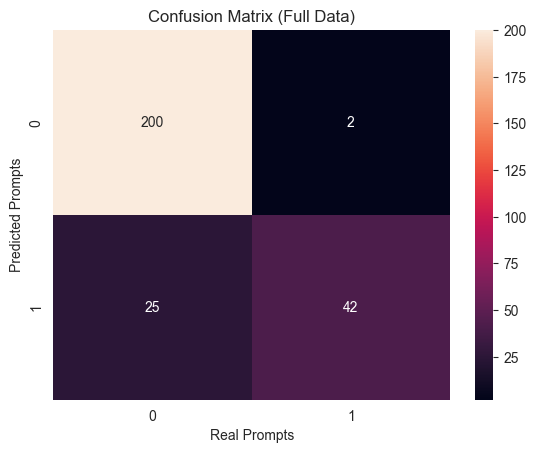

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# train a logistic regression model on the entire dataset
# note, this is not how machine learning works in practice, but I do not want to introduce you to machine learning

# need to remove prompt
all_data_classifier = LogisticRegression()
all_data_classifier.fit(tfidf_df, text_df_3_filtered['Willpower']) # train on the entire tf-idf matrix and prompt data (i.e., 1 or 2)

# predict outcomes on the entire dataset
predicted_all_data = all_data_classifier.predict(tfidf_df)

# E\evaluate the model on the entire dataset
print("Logistic Regression Accuracy (Full Data):", metrics.accuracy_score(text_df_3_filtered['Willpower'], predicted_all_data))
print("Logistic Regression Precision (Full Data):", metrics.precision_score(text_df_3_filtered['Willpower'], predicted_all_data))
print("Logistic Regression Recall (Full Data):", metrics.recall_score(text_df_3_filtered['Willpower'], predicted_all_data))

# classification report and confusion matrix
print("\nClassification Report (Full Data):\n", metrics.classification_report(text_df_3_filtered['Willpower'], predicted_all_data))

import seaborn as sns
import matplotlib.pyplot as plt

cm_full_data = metrics.confusion_matrix(text_df_3_filtered['Willpower'], predicted_all_data)
sns.heatmap(cm_full_data, annot=True, fmt='d')
plt.title('Confusion Matrix (Full Data)')
plt.xlabel('Real Prompts')
plt.ylabel('Predicted Prompts')
plt.show()



Class counts in original data:
Willpower
0.0    202
1.0     67
Name: count, dtype: int64

Minority class: 1.0 with 67 instances
Majority class: 0.0 with 202 instances

Balanced class counts:
Willpower
0.0    67
1.0    67
Name: count, dtype: int64

Logistic Regression Accuracy (Balanced Data): 0.9328358208955224
Logistic Regression Precision (Balanced Data): 0.9142857142857143
Logistic Regression Recall (Balanced Data): 0.9552238805970149

Classification Report (Balanced Data):
               precision    recall  f1-score   support

         0.0       0.95      0.91      0.93        67
         1.0       0.91      0.96      0.93        67

    accuracy                           0.93       134
   macro avg       0.93      0.93      0.93       134
weighted avg       0.93      0.93      0.93       134



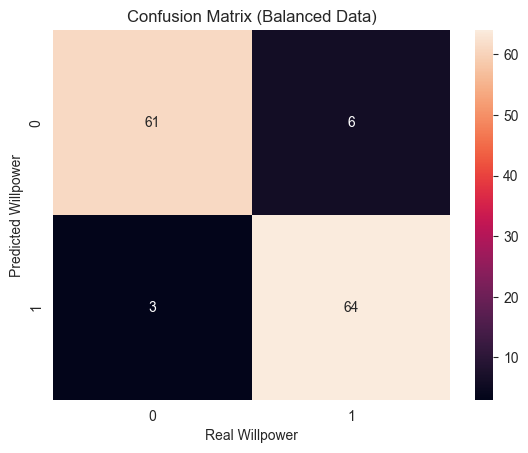

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.utils import shuffle
import seaborn as sns
import matplotlib.pyplot as plt

# y = labels
y = text_df_3_filtered['Willpower']

# 1. Check class counts
print("Class counts in original data:")
print(y.value_counts())

# 2. Get minority size and indices for each class
class_counts = y.value_counts()
minority_class = class_counts.idxmin()
majority_class = class_counts.idxmax()
n_minority = class_counts.min()

print("\nMinority class:", minority_class, "with", n_minority, "instances")
print("Majority class:", majority_class, "with", class_counts.max(), "instances")

# indices for each class
minority_idx = y[y == minority_class].index
majority_idx_sampled = y[y == majority_class].sample(
    n=n_minority, random_state=1234  # random_state for reproducibility
).index

# 3. Combine indices and build balanced X and y
balanced_idx = minority_idx.union(majority_idx_sampled)
X_bal = tfidf_df.loc[balanced_idx]
y_bal = y.loc[balanced_idx]

# optional: shuffle rows so classes are mixed
X_bal, y_bal = shuffle(X_bal, y_bal, random_state= 14312)

print("\nBalanced class counts:")
print(y_bal.value_counts())

# 4. Train logistic regression on the balanced dataset
bal_classifier = LogisticRegression()
bal_classifier.fit(X_bal, y_bal)

# Predict on the same balanced dataset (same style as your original analysis)
predicted_bal = bal_classifier.predict(X_bal)

# 5. Evaluate on the balanced dataset
print("\nLogistic Regression Accuracy (Balanced Data):",
      metrics.accuracy_score(y_bal, predicted_bal))
print("Logistic Regression Precision (Balanced Data):",
      metrics.precision_score(y_bal, predicted_bal))
print("Logistic Regression Recall (Balanced Data):",
      metrics.recall_score(y_bal, predicted_bal))

print("\nClassification Report (Balanced Data):\n",
      metrics.classification_report(y_bal, predicted_bal))

# 6. Confusion matrix and heatmap
cm_bal = metrics.confusion_matrix(y_bal, predicted_bal)

sns.heatmap(cm_bal, annot=True, fmt='d')
plt.title('Confusion Matrix (Balanced Data)')
plt.xlabel('Real Willpower')
plt.ylabel('Predicted Willpower')
plt.show()


In [32]:
# --------------------------------------------------------
# 7. Extract coefficients from balanced logistic regression
# --------------------------------------------------------

import pandas as pd
import numpy as np

# Get the coefficient array (flatten to 1D)
coef = bal_classifier.coef_.flatten()

# Get feature names from the TF-IDF vectorizer used
feature_names = tfidf_df.columns  # since you already have tfidf_df

# Build dataframe
coef_df = pd.DataFrame({
    'feature': feature_names,
    'coefficient': coef
})

# Sort by coefficient
coef_df_sorted = coef_df.sort_values(by='coefficient', ascending=True)

# Lowest (most negative predictors)
lowest_20 = coef_df_sorted.head(20)

# Highest (most positive predictors)
highest_20 = coef_df_sorted.tail(20)

print("\n==== Lowest 20 coefficients (negative predictors) ====")
print(lowest_20)

print("\n==== Highest 20 coefficients (positive predictors) ====")
print(highest_20)

# --------------------------------------------------------
# Optional: visualize (similar to your concatenation style)
# --------------------------------------------------------
lowest_20 = lowest_20.reset_index(drop=True)
highest_20 = highest_20.reset_index(drop=True)

lowest_20.columns = [col + "_neg" for col in lowest_20.columns]
highest_20.columns = [col + "_pos" for col in highest_20.columns]

coef_compare = pd.concat([lowest_20, highest_20], axis=1)
coef_compare



==== Lowest 20 coefficients (negative predictors) ====
      feature  coefficient
11       work    -0.977785
144      like    -0.699467
35       keep    -0.698819
120       dad    -0.675863
32        idk    -0.673703
170     learn    -0.637571
55      could    -0.621744
93      basic    -0.604666
92      using    -0.550038
145   working    -0.546145
31        try    -0.541970
80       self    -0.540125
289    really    -0.522603
20       fail    -0.521311
135        im    -0.486927
325   keeping    -0.483874
186    wanted    -0.483049
79       good    -0.477893
338      take    -0.460589
72   disagree    -0.452520

==== Highest 20 coefficients (positive predictors) ====
      feature  coefficient
235   clicked     0.428451
148      gave     0.435428
30        get     0.454137
196   torcher     0.472315
191    answer     0.477968
140    lesson     0.481277
141     think     0.484628
39         ok     0.516385
198  studying     0.521933
270      tell     0.568989
28     worked     0.584

,feature_neg,coefficient_neg,feature_pos,coefficient_pos
0,work,-0.977785,clicked,0.428451
1,like,-0.699467,gave,0.435428
2,keep,-0.698819,get,0.454137
3,dad,-0.675863,torcher,0.472315
4,idk,-0.673703,answer,0.477968
5,learn,-0.637571,lesson,0.481277
6,could,-0.621744,think,0.484628
7,basic,-0.604666,ok,0.516385
8,using,-0.550038,studying,0.521933
9,working,-0.546145,tell,0.568989


In [35]:
human_cols = ['Willpower', 'Effort', 'Performance Self-Talk (Approach/Avoidance)']   # example

In [40]:
common_idx = tfidf_df.index.intersection(text_df_3_filtered.index)

X_full = tfidf_df.loc[common_idx]
human_df = text_df_3_filtered.loc[common_idx, human_cols]

# full correlation matrix
corr_matrix = X_full.join(human_df).corr()

# slice to get only (human coding) × (tf-idf features)
corr_human_tfidf = corr_matrix.loc[human_cols, X_full.columns]

# example: correlations between Willpower and all tf-idf features
corr = corr_human_tfidf.loc['Effort'].sort_values()

corr

got        -0.064361
going      -0.062879
hard       -0.062145
told       -0.056330
teacher    -0.053590
              ...   
random      0.179210
um          0.179210
j           0.179210
solving     0.179210
strategy    0.179210
Name: Effort, Length: 407, dtype: float64

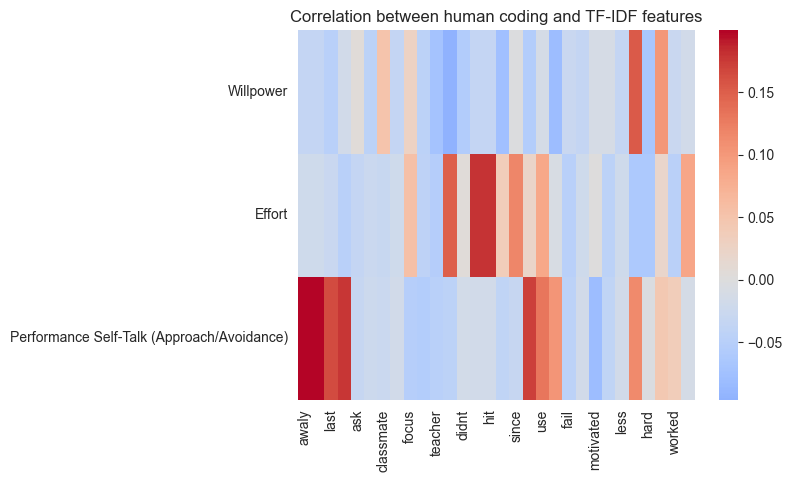

In [37]:
selected_words = corr_human_tfidf.columns[:30]  # or your chosen features
sns.heatmap(corr_human_tfidf.loc[:, selected_words],
            cmap='coolwarm', center=0)
plt.title('Correlation between human coding and TF-IDF features')
plt.show()


In [41]:
import pandas as pd

# --- 1. Align TF-IDF matrix with human-coded labels ---
common_idx = tfidf_df.index.intersection(text_df_3_filtered.index)

X_full = tfidf_df.loc[common_idx]                     # TF-IDF word matrix
y_full = text_df_3_filtered.loc[common_idx, 'Willpower']  # human coding 0/1

# --- 2. Compute correlation between each TF-IDF word and Willpower ---
corr = X_full.corrwith(y_full)

# --- 3. Sort correlations (most positive → most negative) ---
corr_sorted = corr.sort_values(ascending=False)

# --- 4. Create a clean correlation table ---
corr_table = pd.DataFrame({
    'word': corr_sorted.index,
    'correlation_with_willpower': corr_sorted.values
})

# Show top head + tail
print("Top 20 most positively correlated words:")
print(corr_table.head(20))

print("\nTop 20 most negatively correlated words:")
print(corr_table.tail(20))


Top 20 most positively correlated words:
            word  correlation_with_willpower
0          going                    0.153550
1       question                    0.150135
2             ok                    0.149943
3       studying                    0.145206
4          think                    0.144925
5         making                    0.121225
6          mylef                    0.106065
7   overthinking                    0.106065
8       learning                    0.106065
9          later                    0.106065
10       weekend                    0.106065
11         worry                    0.106065
12       grrades                    0.106065
13          year                    0.106065
14      remember                    0.106065
15      stragies                    0.106065
16         topic                    0.106065
17    workpsaces                    0.106065
18          rest                    0.106065
19        closer                    0.106065

Top 20 most n